<a href="https://colab.research.google.com/github/DivyansCKashyap/ai-sard/blob/main/Vehicle_Routing_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install matplotlib deap


In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [4]:
customers = [(1, 2), (3, 5), (0, 7), (8, 1), (6, 9)]
demands = [10, 15, 8, 22, 13]
vehicle_capacity = 50

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


In [37]:
def create_route():
    route = list(range(len(customers)))
    random.shuffle(route)
    return route

def create_individual():
    return [create_route()]

toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [38]:
def crossover_routes(ind1, ind2):
    """Order crossover for VRP."""
    size1 = len(ind1[0])
    size2 = len(ind2[0])
    if size1 < 2 or size2 < 2:
        return ind1, ind2
    cxpoint1, cxpoint2 = sorted(random.sample(range(min(size1, size2)), 2))
    temp1 = ind1[0][cxpoint1:cxpoint2+1] + [c for c in ind2[0] if c not in ind1[0][cxpoint1:cxpoint2+1]]
    temp2 = ind2[0][cxpoint1:cxpoint2+1] + [c for c in ind1[0] if c not in ind2[0][cxpoint1:cxpoint2+1]]
    ind1[0][:], ind2[0][:] = temp1, temp2
    return ind1, ind2


def mutate_route(individual, indpb=0.05):
    """Swap mutation for VRP."""
    for route in individual:
        if len(route) > 1:
            for i in range(len(route)):
                if random.random() < indpb:
                    j = random.randint(0, len(route) - 1)
                    route[i], route[j] = route[j], route[i]
    return individual,





In [39]:
def evaluate(individual):
    total_distance = 0
    for route in individual:
        # Calculate distance traveled on this route
        route_distance = 0
        prev_customer = None
        for customer_idx in route:
            if prev_customer is not None:
                x1, y1 = customers[prev_customer]
                x2, y2 = customers[customer_idx]
                distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                route_distance += distance
            prev_customer = customer_idx
        total_distance += route_distance

        # Check capacity constraint
        route_demand = sum(demands[i] for i in route)
        if route_demand > vehicle_capacity:
            # Penalize solutions that violate capacity
            total_distance += 1000  # Example penalty

    return (total_distance,)

In [40]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", crossover_routes)
toolbox.register("mutate", mutate_route)

In [41]:
# Run the genetic algorithm
def run_ga(generations=200, pop_size=100):
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)  # Store the best individual

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=generations, stats=stats, halloffame=hof, verbose=True)

    return pop, logbook, hof

gen	nevals	avg    	min    
0  	100   	1025.58	1020.61
1  	88    	1024.26	1020.61
2  	79    	1023.1 	1020.61
3  	88    	1023.38	1020.61
4  	79    	1023.52	1020.61
5  	89    	1023.67	1020.61
6  	86    	1023.05	1020.61
7  	89    	1023.77	1020.61
8  	86    	1023.26	1020.61
9  	92    	1023.27	1020.61
10 	87    	1023.32	1020.61
11 	91    	1023.49	1020.61
12 	90    	1023.4 	1020.61
13 	80    	1023.37	1020.61
14 	90    	1023.75	1020.61
15 	88    	1023.27	1020.61
16 	77    	1022.74	1020.61
17 	81    	1022.43	1020.61
18 	81    	1022.37	1020.61
19 	79    	1023.13	1020.61
20 	76    	1023.02	1020.61
21 	83    	1023.12	1020.61
22 	81    	1022.89	1020.61
23 	87    	1022.88	1020.61
24 	90    	1023.32	1020.61
25 	86    	1023.01	1020.61
26 	86    	1022.95	1020.61
27 	86    	1023.52	1020.61
28 	90    	1023.09	1020.61
29 	84    	1023.26	1020.61
30 	80    	1023.08	1020.61
31 	81    	1022.66	1020.61
32 	89    	1022.84	1020.61
33 	87    	1023.15	1020.61
34 	77    	1023.03	1020.61
35 	83    	1022.94	1020.61
3

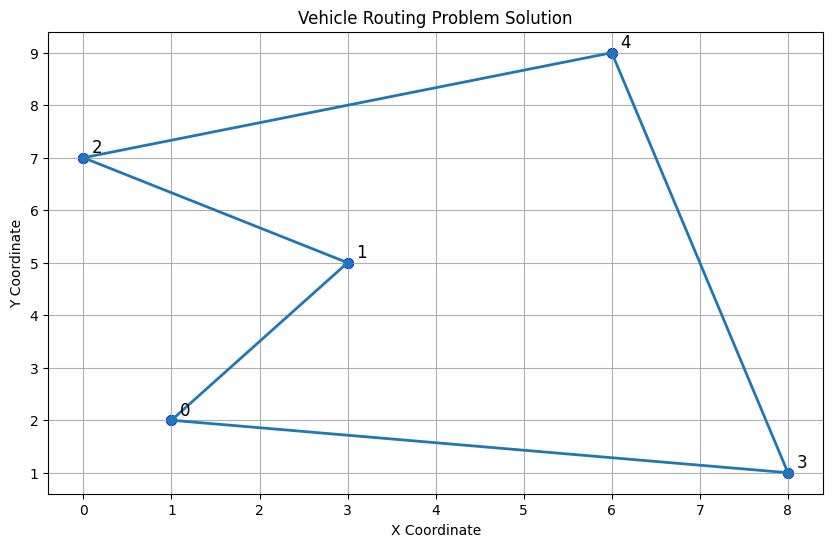

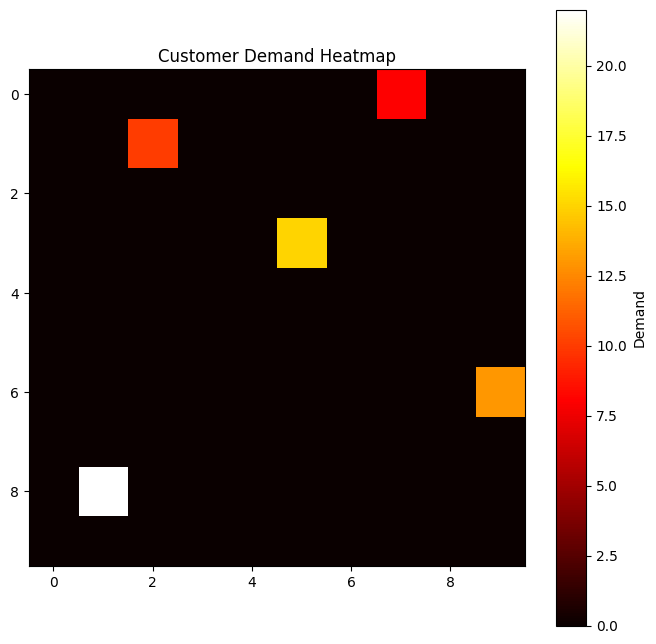

In [42]:
def plot_vrp_solution(individual):
    """Plots the VRP solution."""
    plt.figure(figsize=(10, 6))

    # Plot customer locations
    for i, (x, y) in enumerate(customers):
        plt.scatter(x, y, marker='o', color='blue', s=50)
        plt.text(x + 0.1, y + 0.1, str(i), fontsize=12)

    # Plot routes
    for route in individual:
        if len(route) > 0:
            route_coords = [customers[i] for i in route]
            route_coords.append(route_coords[0])  # Close the loop
            xs, ys = zip(*route_coords)
            plt.plot(xs, ys, marker='o', linestyle='-', linewidth=2)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Vehicle Routing Problem Solution')
    plt.grid(True)
    plt.show()

# Create a 2D matrix to visualize the VRP solution
def plot_vrp_matrix(individual):
    matrix_size = max(max(x, y) for x, y in customers) + 1
    matrix = np.zeros((matrix_size, matrix_size))

    # Populate the matrix with demands
    for (x, y), demand in zip(customers, demands):
        matrix[x, y] = demand

    plt.figure(figsize=(8, 8))
    plt.imshow(matrix, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Demand')
    plt.title('Customer Demand Heatmap')
    plt.show()

# Call the plotting functions after running the genetic algorithm
pop, logbook, hof = run_ga()
best_individual = hof[0]
plot_vrp_solution(best_individual)
plot_vrp_matrix(best_individual)